Prediction Accuracy for Cause Category: 100.00%


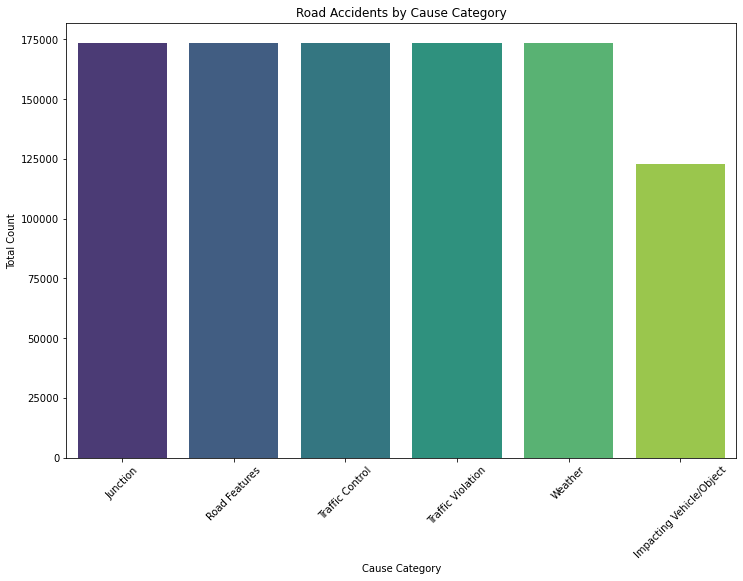

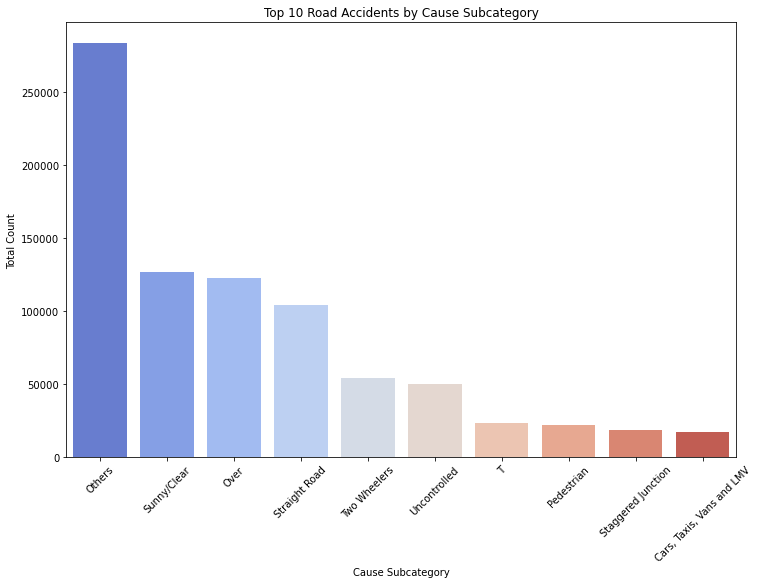

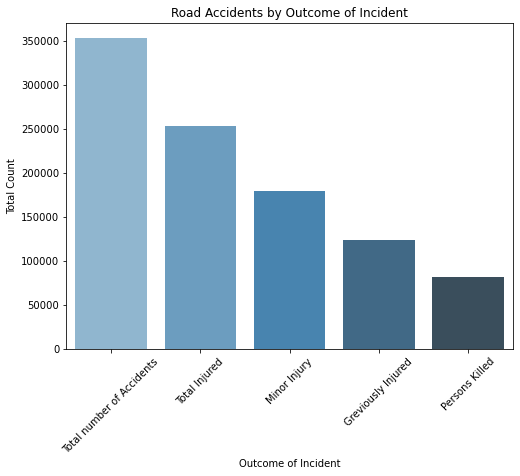

Analysis Results:
Total Accidents: 989333.0
Most Common Cause Category: Junction
Most Common Cause Subcategory: Others
Most Common Outcome: Total number of Accidents


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = r"C:\Users\Pravallika\Downloads\Regulatory Affairs of Road Accident Data 2020 India.csv"  # Replace with the actual file path
data = pd.read_csv(file_path)

# Data Cleaning
data['Cause category'] = data['Cause category'].astype(str)
data['Cause Subcategory'] = data['Cause Subcategory'].astype(str)
data['Outcome of Incident'] = data['Outcome of Incident'].astype(str)

# Ensure 'Count' column is numeric
data['Count'] = pd.to_numeric(data['Count'], errors='coerce')

# Assume you have predicted outcomes in a column 'Predicted Cause category'
# (This is just an example, replace with actual predicted data if available)
data['Predicted Cause category'] = data['Cause category']  # Example: Using actual data as predicted

# Calculate accuracy for Cause Category prediction
accuracy = accuracy_score(data['Cause category'], data['Predicted Cause category'])
print(f"Prediction Accuracy for Cause Category: {accuracy * 100:.2f}%")

# 1. Road Accidents by Cause Category
cause_category_accidents = data.groupby('Cause category')['Count'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=cause_category_accidents.index, y=cause_category_accidents.values, palette='viridis')
plt.title('Road Accidents by Cause Category')
plt.xlabel('Cause Category')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.show()

# 2. Road Accidents by Cause Subcategory
cause_subcategory_accidents = data.groupby('Cause Subcategory')['Count'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=cause_subcategory_accidents.index, y=cause_subcategory_accidents.values, palette='coolwarm')
plt.title('Top 10 Road Accidents by Cause Subcategory')
plt.xlabel('Cause Subcategory')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.show()

# 3. Road Accidents by Outcome of Incident
outcome_accidents = data.groupby('Outcome of Incident')['Count'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=outcome_accidents.index, y=outcome_accidents.values, palette='Blues_d')
plt.title('Road Accidents by Outcome of Incident')
plt.xlabel('Outcome of Incident')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.show()

# Insights
analysis_results = {
    "Total Accidents": data['Count'].sum(),
    "Most Common Cause Category": cause_category_accidents.idxmax(),
    "Most Common Cause Subcategory": cause_subcategory_accidents.idxmax(),
    "Most Common Outcome": outcome_accidents.idxmax(),
}

print("Analysis Results:")
for key, value in analysis_results.items():
    print(f"{key}: {value}")
